<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

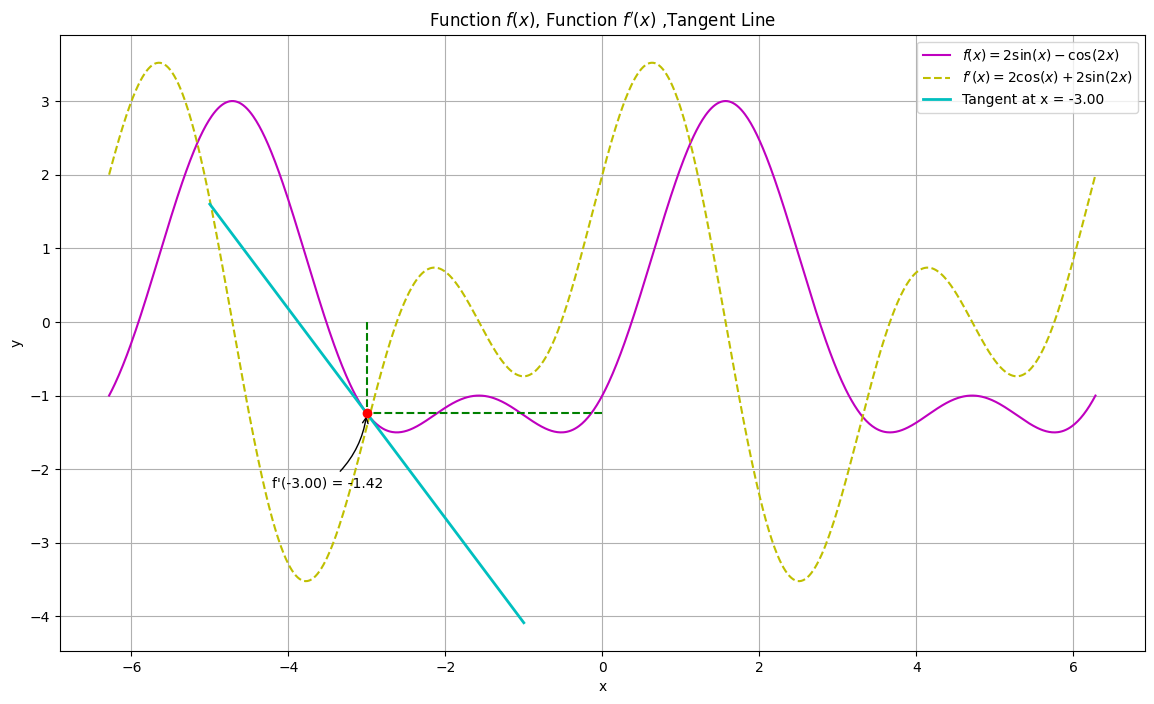

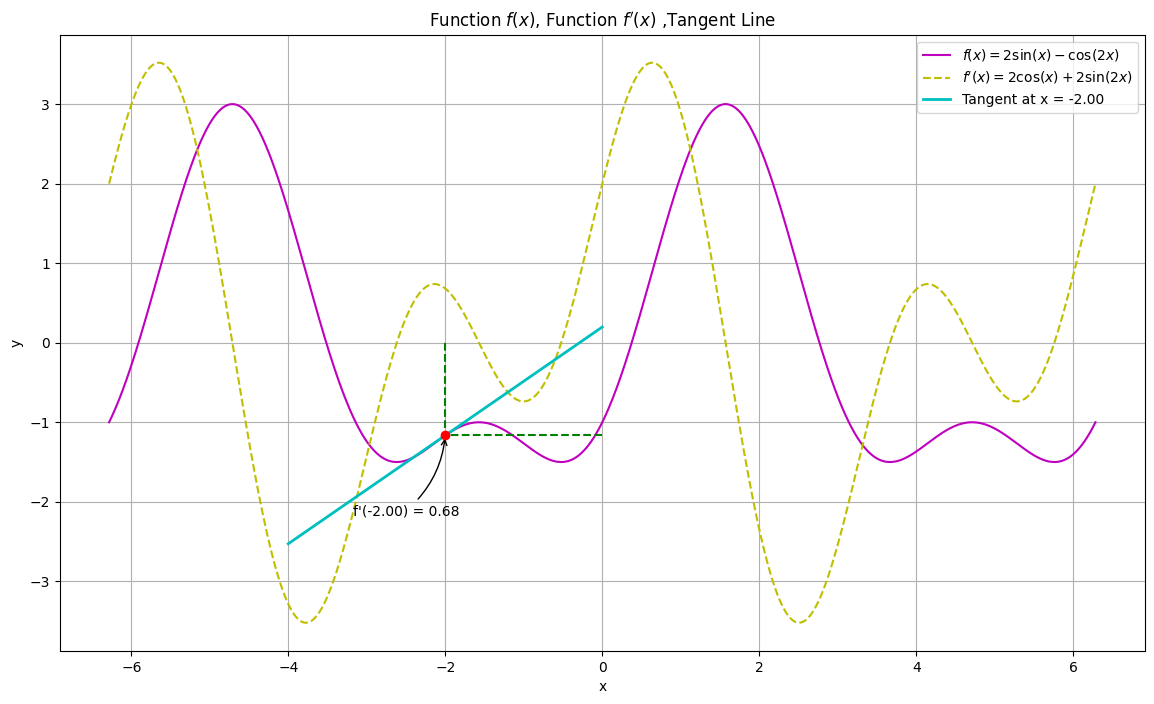

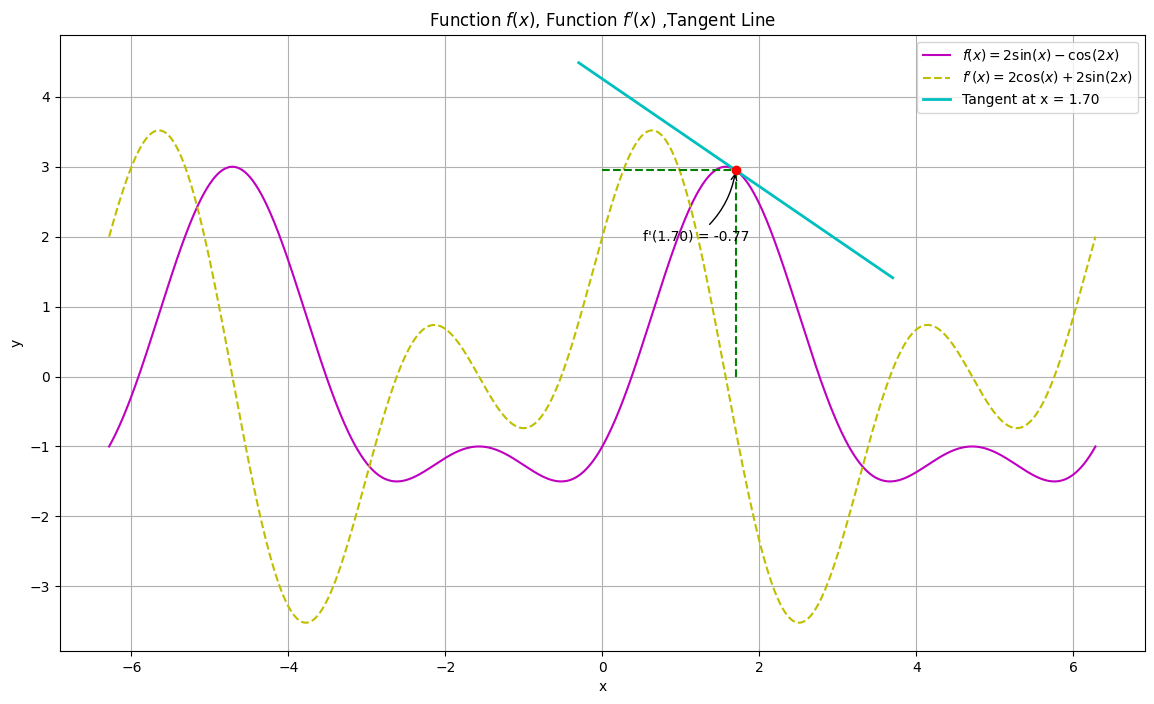

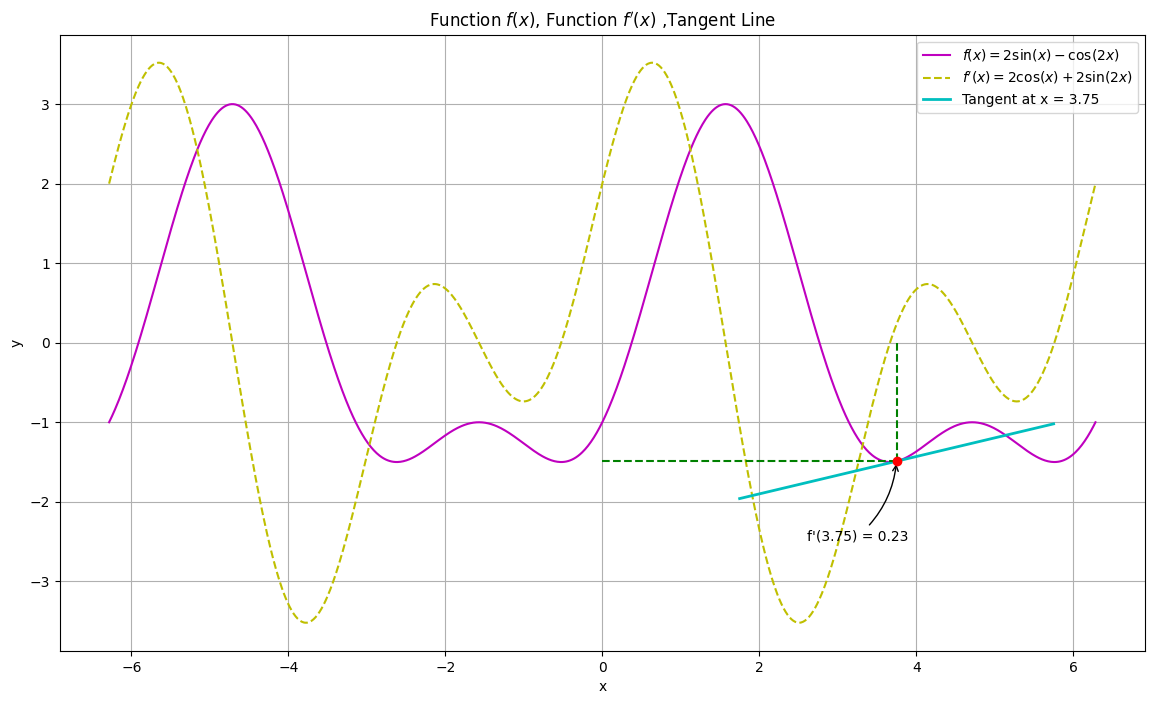

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

def df_dx(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(t):
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y = f(x)
    dy_dx = df_dx(x)
    ft = f(t)
    dft_dx = df_dx(t)
    tangent_x = np.linspace(t - 2, t + 2, 1000)
    tangent_y = ft + dft_dx * (tangent_x - t)

    plt.figure(figsize=(14, 8))
    plt.plot(x, y, 'm', label=r'$f(x) = 2 \sin(x) - \cos(2x)$')
    plt.plot(x, dy_dx, 'y--', label=r"$f ' (x) = 2\cos(x) + 2\sin(2x)$")
    plt.plot(tangent_x, tangent_y, 'c', linewidth=2, label=f'Tangent at x = {t:.2f}')

    plt.scatter([t], [ft], color='r', zorder=6)
    plt.vlines(t, 0, ft, linestyle='dashed', color='g')
    plt.hlines(ft, 0, t, linestyle='dashed', color='g')
    plt.annotate(f"f'({t:.2f}) = {dft_dx:.2f}",
             xy=(t, ft),
             xytext=(t - 0.5, ft - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle="arc3,rad=0.2"),
             fontsize=10, ha='center')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r"Function $f(x)$, Function $f'(x)$ ,Tangent Line")
    plt.legend()
    plt.grid(True)

    plt.show()
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)
beauty_derivative_plot(3.75)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

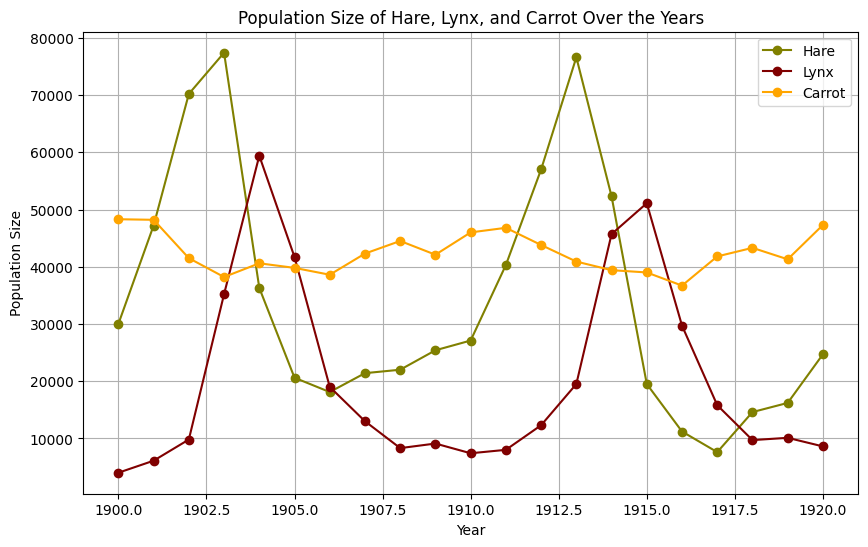

In [65]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)


years = data[:, 0].astype(int)
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(years, hare, label="Hare", color='olive', marker='o')
plt.plot(years, lynx, label="Lynx", color='maroon', marker='o')
plt.plot(years, carrot, label="Carrot", color='orange', marker='o')

plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Population Size of Hare, Lynx, and Carrot Over the Years")

plt.legend()
plt.grid(True)

plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

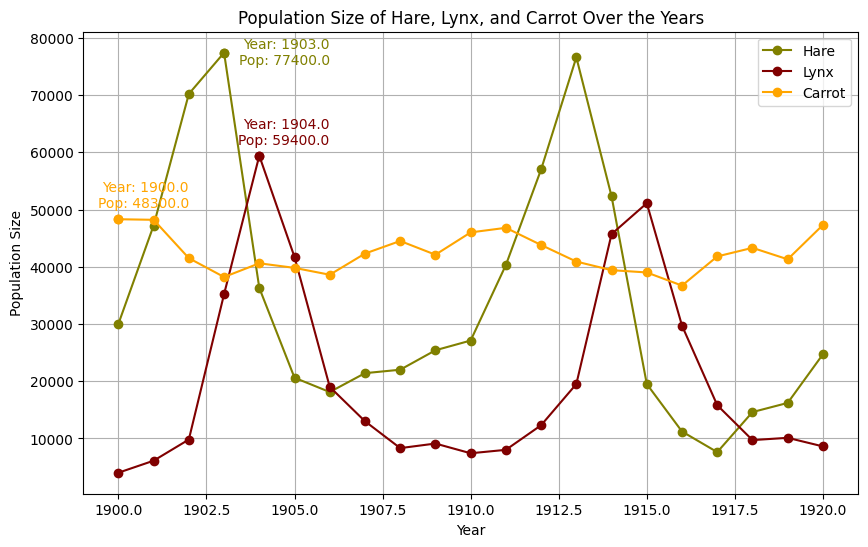

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(years, hare, label="Hare", color='olive', marker='o')
plt.plot(years, lynx, label="Lynx", color='maroon', marker='o')
plt.plot(years, carrot, label="Carrot", color='orange', marker='o')

hare_max_year = years[np.argmax(hare)]
hare_max_pop = np.max(hare)

lynx_max_year = years[np.argmax(lynx)]
lynx_max_pop = np.max(lynx)

carrot_max_year = years[np.argmax(carrot)]
carrot_max_pop = np.max(carrot)

plt.scatter(hare_max_year, hare_max_pop, color='olive', zorder=5)
plt.scatter(lynx_max_year, lynx_max_pop, color='maroon', zorder=5)
plt.scatter(carrot_max_year, carrot_max_pop, color='orange', zorder=5)

plt.text(hare_max_year+3, hare_max_pop-2000, f'Year: {hare_max_year}\nPop: {hare_max_pop}', color='olive', ha='right')
plt.text(lynx_max_year+2, lynx_max_pop+2000, f'Year: {lynx_max_year}\nPop: {lynx_max_pop}', color='maroon', ha='right')
plt.text(carrot_max_year+2, carrot_max_pop+2000, f'Year: {carrot_max_year}\nPop: {carrot_max_pop}', color='orange', ha='right')

plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Population Size of Hare, Lynx, and Carrot Over the Years")
plt.legend()

plt.grid(True)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

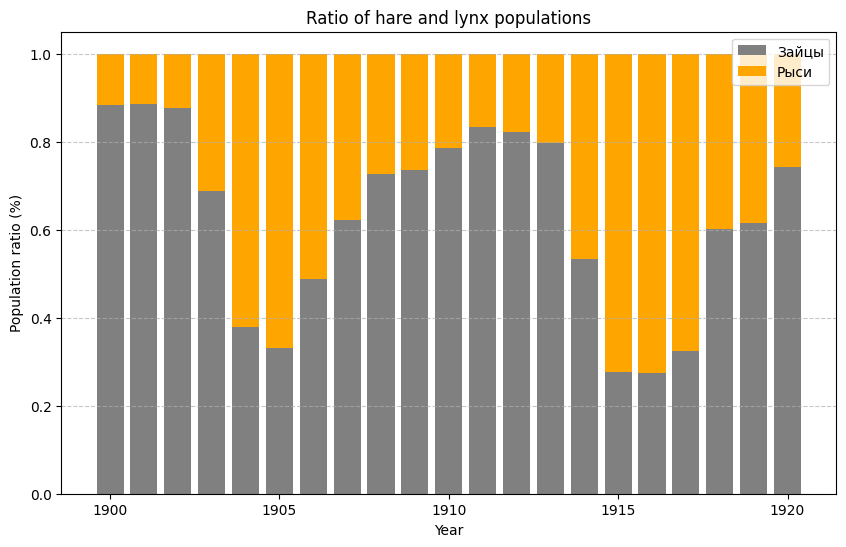

In [89]:
total = hares + lynxes

hare_ratio = hares / total
lynx_ratio = lynxes / total

plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label="Зайцы", color='gray')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label="Рыси", color='orange')

plt.xlabel("Year")
plt.ylabel("Population ratio (%)")
plt.title("Ratio of hare and lynx populations")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

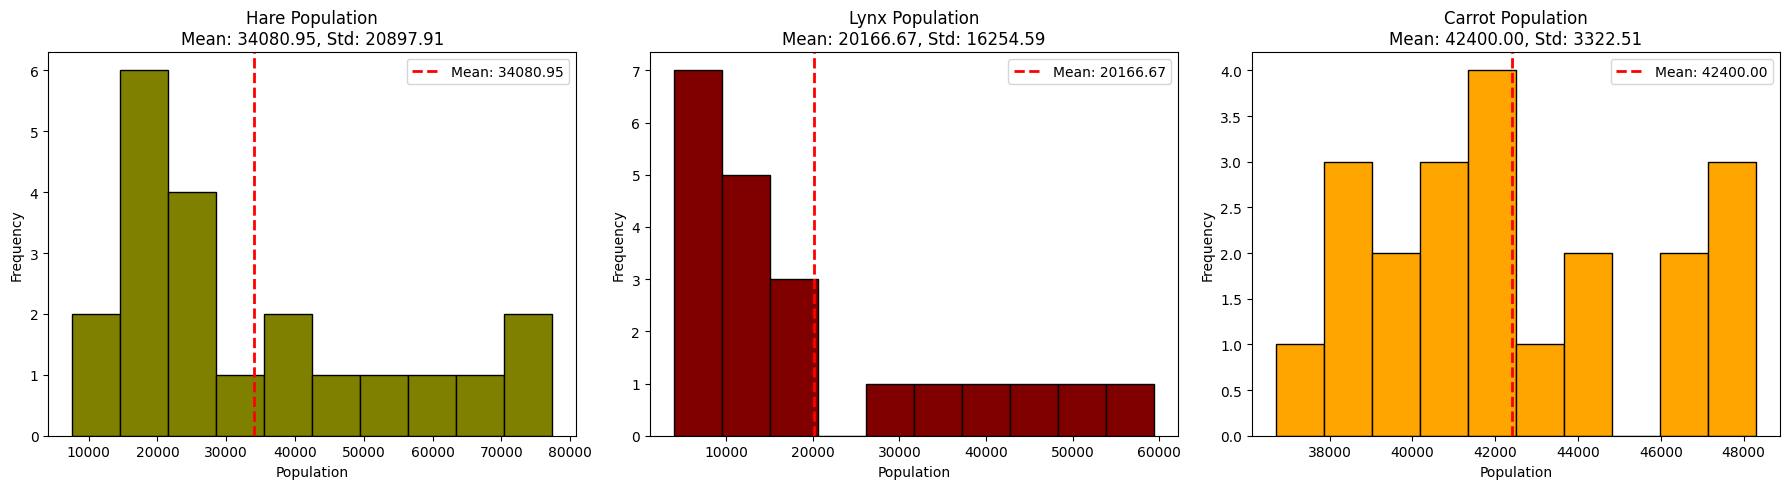

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

mean_hares = np.mean(hares)
std_hares  = np.std(hares)
ax1.hist(hares, bins=10, color='olive', edgecolor='black')
ax1.axvline(mean_hares, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_hares:.2f}')
ax1.set_title(f"Hare Population\nMean: {mean_hares:.2f}, Std: {std_hares:.2f}")
ax1.set_xlabel("Population")
ax1.set_ylabel("Frequency")
ax1.legend()

mean_lynxes = np.mean(lynxes)
std_lynxes  = np.std(lynxes)
ax2.hist(lynxes, bins=10, color='maroon', edgecolor='black')
ax2.axvline(mean_lynxes, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_lynxes:.2f}')
ax2.set_title(f"Lynx Population\nMean: {mean_lynxes:.2f}, Std: {std_lynxes:.2f}")
ax2.set_xlabel("Population")
ax2.set_ylabel("Frequency")
ax2.legend()

mean_carrots = np.mean(carrots)
std_carrots  = np.std(carrots)
ax3.hist(carrots, bins=10, color='orange', edgecolor='black')
ax3.axvline(mean_carrots, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_carrots:.2f}')
ax3.set_title(f"Carrot Population\nMean: {mean_carrots:.2f}, Std: {std_carrots:.2f}")
ax3.set_xlabel("Population")
ax3.set_ylabel("Frequency")
ax3.legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['Hares', 'Hares', 'Hares', 'Hares', 'Lynxes', 'Lynxes', 'Lynxes', 'Hares', 'Hares', 'Hares', 'Hares', 'Hares', 'Hares', 'Hares', 'Hares', 'Lynxes', 'Lynxes', 'Lynxes', 'Hares', 'Hares', 'Hares']


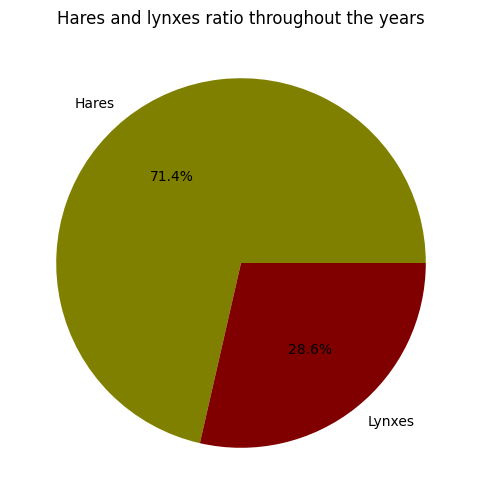

In [87]:
result = np.where(hares >= lynxes, "Hares", "Lynxes")
print(result.tolist())

unique, counts = np.unique(result, return_counts=True)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', colors=['olive','maroon'])
plt.title("Hares and lynxes ratio throughout the years")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

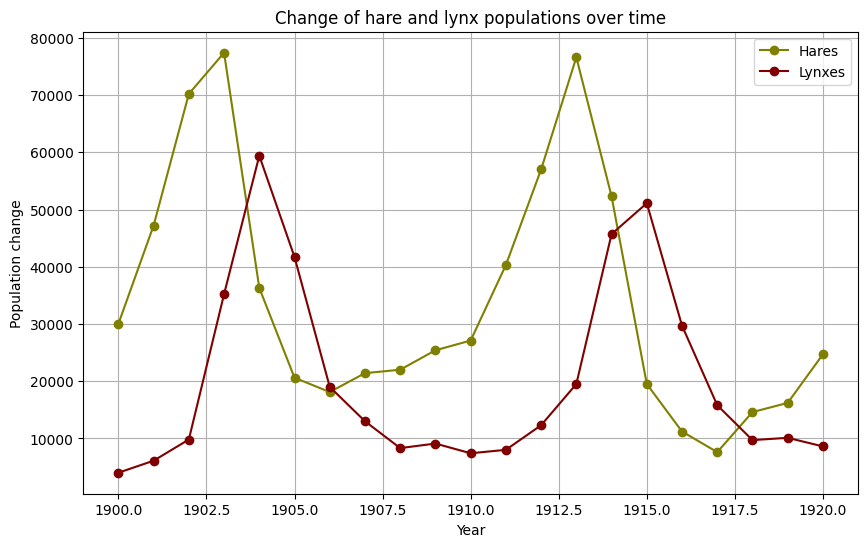

correlation coefficient between hares and lynxes : 0.07189206073535571


In [86]:
plt.figure(figsize=(10,6))
plt.plot(years, hares, label="Hares", color='olive', marker='o')
plt.plot(years, lynxes, label="Lynxes", color='maroon', marker='o')
plt.xlabel("Year")
plt.ylabel("Population change")
plt.title("Change of hare and lynx populations over time")
plt.legend()
plt.grid(True)
plt.show()

corr_matrix = np.corrcoef(hares, lynxes)
corr_coeff = corr_matrix[0, 1]

print("correlation coefficient between hares and lynxes :", corr_coeff)

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

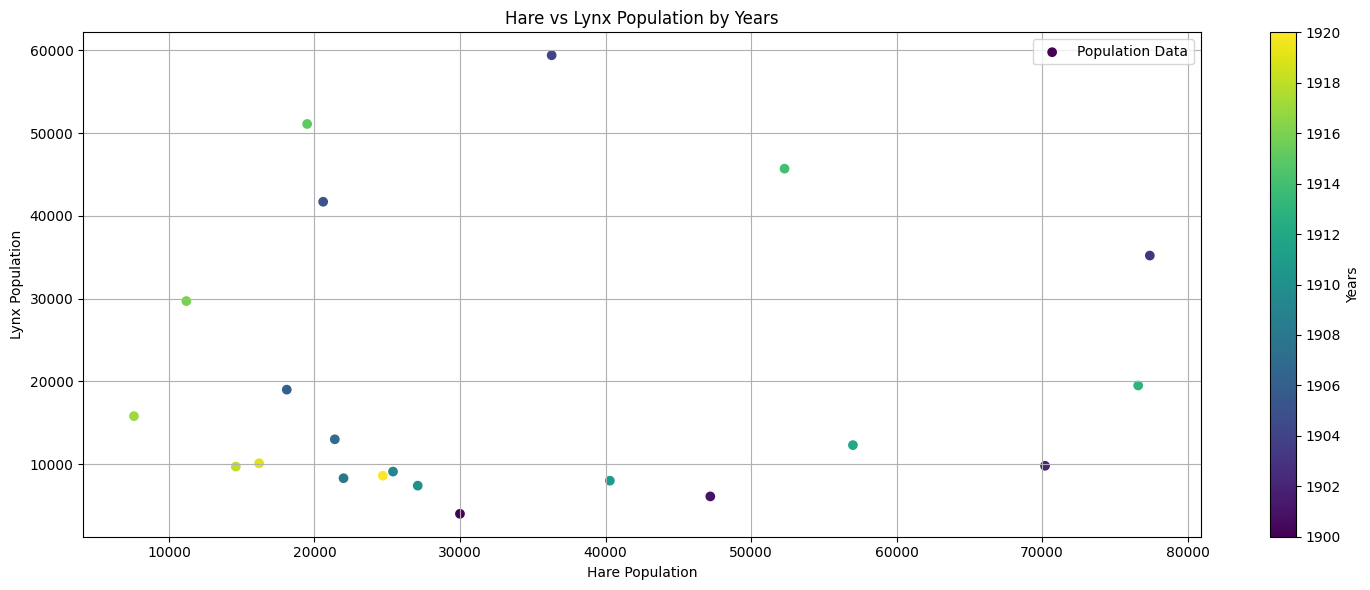

In [85]:
plt.figure(figsize=(15, 6))
plt.scatter(hares, lynxes, marker='o', label='Population Data', c=years, cmap='viridis')

plt.xlabel('Hares Population')
plt.ylabel('Lynxes Population')
plt.title('Hares vs Lynxes Population by Years')

plt.colorbar(label='Years', ticks = years[::2])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [93]:
#take data for the previous 3 years (1917, 1918, 1919)
mask = (years >= 1917) & (years < 1920)
hares_recent = hares[mask]

hare_estimated_1920 = np.mean(hares_recent)

index_1920 = np.where(years == 1920)[0][0]
hare_true_1920 = hares[index_1920]

error_ratio = abs(hare_estimated_1920 - hare_true_1920) / hare_true_1920

print(f"Estimated hare population in 1920 (mean method): {hare_estimated_1920:.2f}")
print(f"True hare population in 1920: {hare_true_1920:.2f}")
print(f"Error ratio: {error_ratio:.4f}")

Estimated hare population in 1920 (mean method): 12800.00
True hare population in 1920: 24700.00
Error ratio: 0.4818
